In [1]:
pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1
    Uninstalling pip-22.1:
      Successfully uninstalled pip-22.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import scipy.io
from scipy.io import loadmat
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
import scipy.io
from scipy.io import loadmat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim


In [5]:
#Visualization of all the power charging 
# only three actions 
#dataC75= pd.read_csv('Charge_P75_rn_2.csv')
#dataC75rp= pd.read_csv('Charge_P75_rp.csv')
#dataC50= pd.read_csv('Charge_P50.csv')
#dataD75= pd.read_csv('Charge_D75.csv')



In [6]:
#build a data structre to manipulate Raw Data file

class RawData:

    def __init__(self, name='' ):
        self.name = name      
        
        
        
    def convert_mat_tocsv(self):

        mat = scipy.io.loadmat(self.name +'.mat')
        
        for i in mat:
            if '__' not in i and 'readme' not in i:
                 np.savetxt((self.name+".csv"), mat[i],delimiter=',')
                    
                    
    def read_data(self): 
        
        data = pd.read_csv(self.name+'.csv',
                  names=["Time_stamp(s)", "AC_Power(W)", "SOC(%)", "DC_Voltage(volt)",\
                        "DC_Current(A)", "Temperature(°C)"])
        return data
    
    

In [7]:
data_C10 = RawData('DataExpRaw_C10hW')
data_C25 = RawData('DataExpRaw_C25hW')
data_C50 = RawData('DataExpRaw_C50hW')
data_C75 = RawData('DataExpRaw_C75hW')
data_C100 = RawData('DataExpRaw_C100hW')
data_D10 = RawData('DataExpRaw_D10hW')
data_D25 = RawData('DataExpRaw_D25hW')
data_D50 = RawData('DataExpRaw_D50hW')
data_D75 = RawData('DataExpRaw_D75hW')
data_D100 = RawData('DataExpRaw_D100hW')

In [8]:
df_C10 = data_C10.read_data()
df_C25 = data_C25.read_data()
df_C100 = data_C100.read_data()
df_C50= data_C50.read_data()
df_C75= data_C75.read_data()
df_D10 = data_D10.read_data()
df_D25 = data_D25.read_data()
df_D100 = data_D100.read_data()
df_D50= data_D50.read_data()
df_D75= data_D75.read_data()


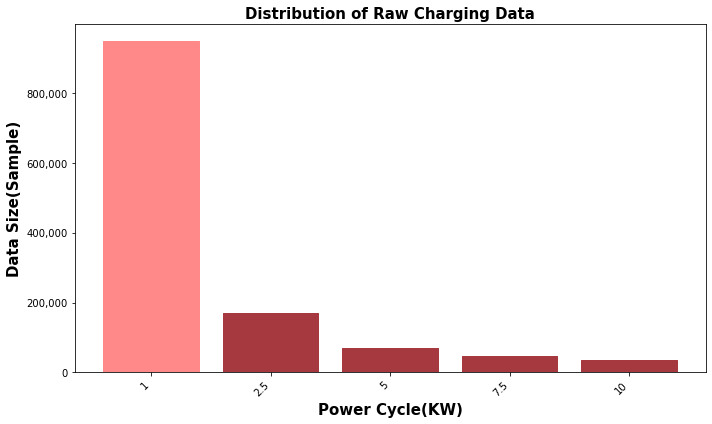

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module


file_paths = ["DataExpRaw_C10hW.csv", "DataExpRaw_C25hW.csv", "DataExpRaw_C50hW.csv", "DataExpRaw_C75hW.csv", "DataExpRaw_C100hW.csv"]
num_lines = []
bar_colors = ['#ff8888', '#A5393F', '#A5393F', '#A5393F', '#A5393F']
bar_labels = ["1", "2.5", "5", "7.5", "10"]


# Count the number of lines in each file
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_lines.append(len(lines))

fig= plt.figure(figsize=(10, 6))
bars=plt.bar(range(1, len(file_paths) + 1), num_lines,tick_label= bar_labels, color=bar_colors)
plt.title('Distribution of Raw Charging Data',  fontweight='bold', fontsize =15)
plt.xlabel('Power Cycle(KW)',  fontweight='bold', fontsize =15)
plt.ylabel('Data Size(Sample)',  fontweight='bold', fontsize =15)
plt.xticks(rotation=45, ha='right')

plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ",")))

# Add color labels to each bar
for bar, color in zip(bars, bar_colors):
    bar.set_color(color)
    
    
plt.tight_layout()
plt.show()
fig.savefig('Distribution_charge.png')


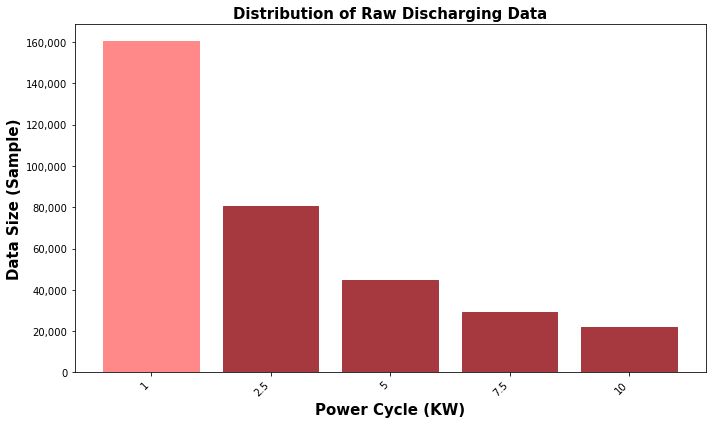

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module


file_paths = ["DataExpRaw_D10hW.csv", "DataExpRaw_D25hW.csv", "DataExpRaw_D50hW.csv", "DataExpRaw_D75hW.csv", "DataExpRaw_D100hW.csv"]
num_lines = []
bar_colors = ['#ff8888', '#A5393F', '#A5393F', '#A5393F', '#A5393F']
bar_labels = ["1", "2.5", "5", "7.5", "10"]


# Count the number of lines in each file
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_lines.append(len(lines))

fig= plt.figure(figsize=(10, 6))
bars=plt.bar(range(1, len(file_paths) + 1), num_lines,tick_label= bar_labels, color=bar_colors)
plt.title('Distribution of Raw Discharging Data',  fontweight='bold', fontsize =15)
plt.xlabel('Power Cycle (KW)',  fontweight='bold', fontsize =15 )
plt.ylabel('Data Size (Sample)',  fontweight='bold', fontsize =15 )
plt.xticks(rotation=45, ha='right')
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ",")))


# Add color labels to each bar
for bar, color in zip(bars, bar_colors):
    bar.set_color(color)
    
    
plt.tight_layout()
plt.show()
fig.savefig('Distribution_discharge.png')


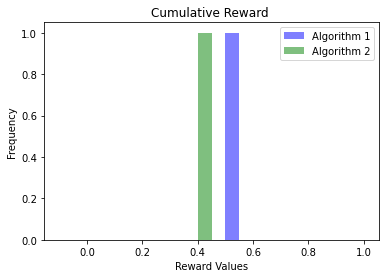

In [11]:
import matplotlib.pyplot as plt

# Sample rewards for Algorithm 1 and Algorithm 2 (replace these with your actual data)
algorithm1_rewards = [0.5]
algorithm2_rewards = [0.4]

# Create a histogram for Algorithm 1 rewards
plt.hist(algorithm1_rewards, bins=20, alpha=0.5, label='Algorithm 1', color='blue')

# Create a histogram for Algorithm 2 rewards
plt.hist(algorithm2_rewards, bins=20, alpha=0.5, label='Algorithm 2', color='green')

# Add labels and a legend
plt.xlabel('Reward Values')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.title('Cumulative Reward ')
plt.show()


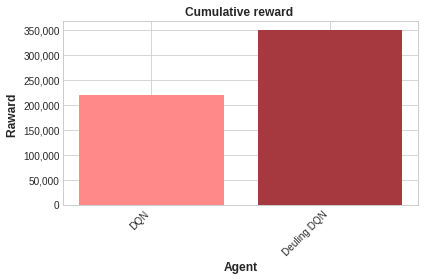

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

bar_colors = ['#ff8888', '#A5393F']
bar_labels = ["DQN", "Deuling DQN", ]
num_lines = [220000, 350000]



fig= plt.figure()
bars=plt.bar(range(2), num_lines,tick_label= bar_labels, color=bar_colors)
plt.title('Cumulative reward ',  fontweight='bold', fontsize= 12)
plt.xlabel('Agent',  fontweight='bold', fontsize= 12)
plt.ylabel('Raward ',  fontweight='bold', fontsize= 12)
plt.xticks(rotation=45, ha='right')
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
# Add color labels to each bar
for bar, color in zip(bars, bar_colors):
    bar.set_color(color)
    
    
plt.tight_layout()
plt.show()
fig.savefig('cumulative_reward.png')

In [14]:
from torch import nn 
from collections import deque 
import itertools 
import numpy as np 
import pandas as pd
import random 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
#Visualization of all the power charging 
# only three actions 
#dataC75= pd.read_csv('Charge_P75_rn_2.csv')
#dataC75rp= pd.read_csv('Charge_P75_rp.csv')
#dataC50= pd.read_csv('Charge_P50.csv')
#dataD75= pd.read_csv('Charge_D75.csv')

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
dqn_9_lr1= pd.read_csv('dqn_9_C_r3.csv')
dqn_3_lr2= pd.read_csv('dqn_3_C_r3_more.csv')
dqn_3_lr1= pd.read_csv('dqn_3_C_r3.csv')

dqn_3= pd.read_csv('Training_3_rq.csv')
dqn_9_lr2= pd.read_csv('dqn_9_C_r3_more.csv')
dqn_9_lr2= pd.read_csv('dqn_9_C_r3_more.csv')


dqn_d_9 = pd.read_csv('dqn_9_D_r3_more.csv')
dqn_d_3= pd.read_csv('dqn_3_D_r3_more.csv')




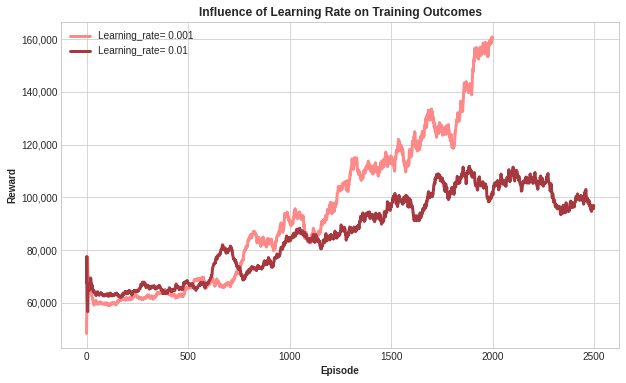

In [18]:


fig=plt.figure(figsize=(10,6))

plt.plot(dqn_9_lr1['avg_scores'], label='Learning_rate= 0.001',color= "#ff8888", lw= 3)
plt.plot(dqn_9_lr2['avg_scores'], label='Learning_rate= 0.01 ', color= "#A5393F", lw= 3 )

# Set thelabels and titl
plt.xlabel('Episode', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.title('Influence of Learning Rate on Training Outcomes' , fontweight='bold')
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
plt.legend()
plt.show()
fig.savefig('learning_rate.png')


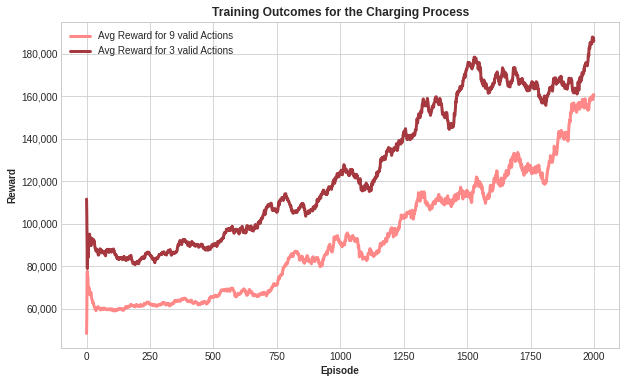

In [19]:


fig=plt.figure(figsize=(10,6))

plt.plot(dqn_9_lr1['avg_scores'], label='Avg Reward for 9 valid Actions',color= "#ff8888", lw= 3)
plt.plot(dqn_d_3['avg_scores'], label='Avg Reward for 3 valid Actions ', color= "#A5393F", lw= 3 )

# Set thelabels and titl
plt.xlabel('Episode', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.title('Training Outcomes for the Charging Process' , fontweight='bold')
plt.gca().get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ",")))
plt.legend()
plt.show()
fig.savefig('two_action_spaces_charge.png')


In [ ]:
g = sns.regplot(x="Stpes ", y="avg_scores", data=dqn_3_lr1)
